## Исследование данных о российском кинопрокате
1. Сбор первоначальных данных:
   - Определение ключевых источников данных: академические базы данных, отчеты Министерства культуры Российской Федерации, онлайн-кинопрокат, базы данных кинотеатров.
   - Сбор данных общего характера о рынке кинопроката в России: общие показатели о прибыли и количестве прокатов, популярность различных типов фильмов.

2. Предварительный анализ данных:
   - Проверка полноты и качества собранных данных.
   - Первоначальная верификация и валидация данных.
   
3. Обработка данных:
   - Очистка данных от ошибок и пропусков.
   - Создание базы данных для последующего анализа.
   
4. Проведение исследовательского анализа:
   - Анализ динамики изменения показателей по годам.
   - Разделение кинопроката по жанрам, платформам просмотра, местам просмотра (кинотеатры, подписные сервисы и др.).
   - Анализ размещения киносеансов по регионам России, изучение предпочтений аудитории в разных регионах.

5. Интерпретация полученных результатов:
   - Сравнение полученных данных с глобальными тенденциями.
   - Обсуждение ключевых открытий, паттернов и выводов.

6. Подготовка отчета и презентации:
   - Презентация результатов исследования в понятном и доступном формате.
   - Подготовка текстового отчета с подробными объяснениями результатов.

7. Обсуждение результатов и планирование дальнейших действий:
   - Обсуждение полученных результатов с заинтересованными сторонами.
   - Выработка рекомендаций и планирование дальнейших шагов на основе результатов исследования.


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('chained_assignment', None)

In [2]:
# Загрузка данных из файлов
movies_data = pd.read_csv('datasets\\mkrf_movies.csv')
shows_data = pd.read_csv('datasets\\mkrf_shows.csv')

In [3]:
display(movies_data)
movies_data.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
display(shows_data)
shows_data.info()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
...,...,...
3153,224014814,"1,530.00"
3154,224021411,"9,270.00"
3155,224022410,400.00
3156,224023210,360.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
# Изменение типа столбца puNumber на числовой формат
movies_data['puNumber'] = pd.to_numeric(movies_data['puNumber'], errors='coerce')
shows_data['puNumber'] = pd.to_numeric(shows_data['puNumber'], errors='coerce')

# Изменение типа столбца puNumber на int
movies_data['puNumber'] = movies_data['puNumber'].astype('Int64')
shows_data['puNumber'] = shows_data['puNumber'].astype('Int64')



In [6]:
merged_data = pd.merge(movies_data, shows_data, on='puNumber', how='left')

В этом коде выполняется несколько операций обработки и слияния данных в двух наборах данных - moviesdata и showsdata.

1. Сначала к столбцу 'puNumber' в каждом из наборов данных применяется функция pd.to_numeric(). Это делается для конвертации значений этого столбца из их текущего формата в числовой формат. Параметр errors='coerce' указывает, что если есть какие-либо значения, которые невозможно преобразовать в числовой формат, они должны быть заменены на NaN.

2. Затем столбец 'puNumber' в каждом из наборов данных преобразуется в тип 'Int64' с использованием метода astype(). Этот шаг своего рода "очистка" - он убедится, что все значения этого столбца теперь являются целыми числами (или, если они были NaN после предыдущего шага, они останутся NaN).

3. Наконец, объединяются два набора данных в один, используя функцию pd.merge(). Метод объединения 'left' означает, что будут включены все строки из moviesdata, даже если совпадений для 'puNumber' в showsdata нет. Значения в строках без совпадений будут NaN. 'puNumber' это общий столбец, который используется для выполнения слияния.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [7]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [8]:
# Преобразование show_start_date в тип datetime
merged_data['show_start_date'] = pd.to_datetime(merged_data['show_start_date'])

# Преобразование в тип category
merged_data['type'] = merged_data['type'].astype('category')
merged_data['age_restriction'] = merged_data['age_restriction'].astype('category')
merged_data['financing_source'] = merged_data['financing_source'].astype('category')
# Замена всех значений, содержащих '%'
merged_data['ratings'] = merged_data['ratings'].str.replace('%', '').astype(float)
merged_data['ratings'] = merged_data['ratings'].apply(lambda x: x / 10 if x > 10 else x)



1. Преобразование поля show_start_date в тип datetime выполнено для того, чтобы можно было корректно выполнять операции с этими данными как с датами. В исходных данных эта информация могла быть представлена в виде строки, что ограничивает возможности её использования. С помощью преобразования в datetime, появляется возможность легко выполнять такие операции, как сортировка, фильтрация по диапазону дат и вычисления на основе дат (например, вычисление количества дней между датами).

2. Преобразование поля type в тип category выполнено с целью оптимизации использования памяти и ускорения обработки данных. Если поле содержит ограниченный набор уникальных значений (т.е. это категориальная переменная), то предпочтительнее использовать тип category вместо object (который используется для строк). Также категориальные данные удобнее для визуализации и статистического анализа.

3. Та же логика применяется для преобразования поля financing_source и age_restriction в тип category. для film_studio	production_country	director	producer и genres этого не делаем потому что очень много комбинаций

4. Преобразование данных в поле ratings предназначено для преобразования процентных значений в числа для удобства работы с данными. Первоначальная строка с процентом заменяется на число с плавающей точкой. Также, предполагая, что максимальное значение рейтинга не может превышать 10, выполняется нормализация значений, которые больше 10, путем деления их на 10. Это обеспечивает единообразие и корректность данных для дальнейшего анализа.

In [9]:
display(merged_data)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7485 non-null   Int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   category           
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   category           
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [11]:
# Комментарий ревьюера
temp = merged_data.copy() # создаем копию датасета до преобразования
len(temp)

7486

In [12]:
# Заменить пропущенные значения в каждом из указанных столбцов
merged_data['film_studio'].fillna('Unknown', inplace=True)
merged_data['production_country'] = merged_data['production_country'].replace('2019', '')
merged_data['production_country'].fillna('Unknown', inplace=True)
merged_data['director'].fillna('Unknown', inplace=True)
merged_data['producer'].fillna('Unknown', inplace=True)
merged_data['genres'].fillna('Unknown', inplace=True)
# Заменить пропущенные значения в столбце 'puNumber' на ноль
merged_data['puNumber'].fillna(0, inplace=True)


C:\Users\ivano\AppData\Local\Temp\ipykernel_25400\1364134147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['film_studio'].fillna('Unknown', inplace=True)
C:\Users\ivano\AppData\Local\Temp\ipykernel_25400\1364134147.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

1. Он заменяет пропущенные значения в указанных столбцах датафрейма merged_data (например, 'film_studio', 'production_country', 'director', 'producer', 'genres', 'puNumber') на соответствующие значения. Значение 'Unknown' используется для строковых столбцов ('film_studio', 'production_country', 'director', 'producer', 'genres'), чтобы указать, что информация отсутствует или неизвестна.

2. Значение 0 используется для столбца 'puNumber', чтобы указать на отсутствие информации о номере прокатного удостоверения. Таким образом, после выполнения этого кода пропущенных значений в этих столбцах больше не будет, и информация будет готова к использованию в дальнейших анализах или вычислениях.

3. Для refundable_support,	nonrefundable_support,	budget и financing_source	не заполняем пропуски так как они означают что фильм без господдежки

4. box_office суммы сборов не заполняем потому что фильмы не зависят друг от друга и заполнять средним или медианым значением приведет к не корректной информации

In [13]:
display(merged_data)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,Unknown,NaN


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [14]:
# Проверить наличие дубликатов строк в данных.
duplicates = merged_data.duplicated()

# Если есть дубликаты, вывести их.
if duplicates.any():
    print("Найдены дубликаты:")
    print(merged_data[duplicates])
else:
    print("Строк дубликатов нет")

Строк дубликатов нет


In [15]:
duplicated_titles = merged_data[merged_data['title'].duplicated(keep=False)]
display(duplicated_titles)


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


In [16]:
duplicated_titles = merged_data[merged_data['puNumber'].duplicated(keep=False)]
display(duplicated_titles)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


In [17]:
duplicated_titles = merged_data[merged_data[['puNumber', 'title']].duplicated(keep=False)]

if duplicated_titles.empty:
    print("Дубликатов нет")
else:
    display(duplicated_titles)

Дубликатов нет


In [18]:
# Комментарий ревьюера
a, b = len(temp), len(merged_data)
print(a, b, round((a-b)/a*100, 2))

7486 7486 0.0


In [19]:
display(merged_data)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,Unknown,NaN


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [20]:
categorical_columns = merged_data.select_dtypes(include=['category']).columns

for column in categorical_columns:
    unique_values = merged_data[column].unique()
    unique_count = merged_data[column].nunique()

    print(f"Столбец: {column}")
    print(f"Уникальные значения: {unique_values}")
    print(f"Количество уникальных значений: {unique_count}")
    print('---')


Столбец: type
Уникальные значения: ['Художественный', 'Анимационный', 'Прочие', 'Документальный', 'Научно-популярный', ' Художественный', ' Анимационный', 'Музыкально-развлекательный']
Categories (8, object): [' Анимационный', ' Художественный', 'Анимационный', 'Документальный', 'Музыкально-развлекательный', 'Научно-популярный', 'Прочие', 'Художественный']
Количество уникальных значений: 8
---
Столбец: age_restriction
Уникальные значения: ['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет', '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', '«0+» - для любой зрительской аудитории']
Categories (5, object): ['«0+» - для любой зрительской аудитории', '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей', '«6+» - для детей старше 6 лет']
Количество уникальных значений: 5
---
Столбец: financing_source
Уникальные значения: [NaN, 'Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино']
Categories (3,

In [21]:
categorical_object_columns = merged_data.select_dtypes(include=['category', 'object']).columns

if len(categorical_object_columns) > 0:
    for column in categorical_object_columns:
        unique_values = merged_data[column].unique()
        print(f"\nКолонка: {column}")
        print(f"Уникальные значения до исправления: {unique_values}")
        print("-----------------------------------")
        # Заменяем все разделители на одинаковые
        merged_data[column] = merged_data[column].str.replace(' - ', '-')
        merged_data[column] = merged_data[column].str.replace('-', ',')
        merged_data[column] = merged_data[column].str.replace(',', ', ')
        # Удаляем пробелы в начале и конце строки
        merged_data[column] = merged_data[column].str.strip().str.lower()
        
        unique_values_after_fix = merged_data[column].unique()
        print(f"Уникальные значения после исправления: {unique_values_after_fix}")
        
        print("-----------------------------------")
else:
    print("Нет категориальных или объектных колонок в датафрейме")


Колонка: title
Уникальные значения до исправления: ['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']
-----------------------------------
Уникальные значения после исправления: ['открытый простор' 'особо важное задание' 'особо опасен' ...
 'щенячий патруль: скорей спешим на помощь!'
 'машины песенки. серия "испанские мотивы"'
 'машины песенки. серия "когда цветут кактусы"']
-----------------------------------

Колонка: type
Уникальные значения до исправления: ['Художественный', 'Анимационный', 'Прочие', 'Документальный', 'Научно-популярный', ' Художественный', ' Анимационный', 'Музыкально-развлекательный']
Categories (8, object): [' Анимационный', ' Художественный', 'Анимационный', 'Документальный', 'Музыкально-развлекательный', 'Научно-популярный', 'Прочие', 'Художественный']
-----------------------------------
Уникальные значения после 

Помимо пробелов в начале или вконце значений, написания разного регистра, на пример исходя из уникальных значений в столбце 'production_country', кажется, что одной из основных проблем является несогласованность в использовании разделителей для обозначения нескольких стран-производителей. Иногда используется тире ("-"), иногда пробел с дефисом (" - "), иногда запятая без пробелов(','), а иногда дефис без пробелов ("-"). 

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [22]:
merged_data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,486.00",332.00,332.00,332.00,"6,519.00","3,158.00"
mean,"135,178,527.64","11,864,457.83","48,980,988.89","127,229,716.68",6.49,"76,478,696.16"
std,"38,382,177.41","24,916,555.26","59,980,117.92","188,588,333.12",1.11,"240,353,122.82"
min,0.00,0.00,0.00,0.00,1.00,0.00
25%,"112,025,043.00",0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,"121,015,464.50",0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,"124,003,313.75","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


In [23]:
display(merged_data.query('budget <= 0'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев","«16+», для детей старше 16 лет",0.00,"23,000,000.00",0.00,"министерство культуры, фонд кино",6.60,мелодрама,"10,234,016.10"
2058,дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс сту...",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский","«16+», для детей старше 16 лет",0.00,"75,000,000.00",0.00,фонд кино,6.60,драма,"446,163,511.00"
2472,воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""","«12+», для детей старше 12 лет","10,000,000.00","70,000,000.00",0.00,фонд кино,7.80,"боевик, драма, криминал","196,572,438.40"
2532,бармен.,111009615,2015-05-26 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,"«16+», для детей старше 16 лет","20,000,000.00",0.00,0.00,фонд кино,6.20,"комедия, фэнтези","67,418,974.80"
2615,савва. сердце воина,114001715,2015-07-21 12:00:00+00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,"«6+», для детей старше 6 лет","60,000,000.00","100,000,000.00",0.00,фонд кино,4.60,"мультфильм, приключения, фэнтези","184,487,551.40"
2684,тряпичный союз,111010215,2015-06-08 12:00:00+00:00,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев","«18+», запрещено для детей",0.00,"59,000,000.00",0.00,фонд кино,6.30,"комедия, драма","1,957,738.51"
2788,срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский","«16+», для детей старше 16 лет",0.00,"35,000,000.00",0.00,фонд кино,5.10,"комедия, мелодрама","72,937,783.20"
2874,"помню, не помню!",111004916,2016-03-01 12:00:00+00:00,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""","«12+», для детей старше 12 лет",0.00,"6,000,000.00",0.00,министерство культуры,4.30,комедия,"15,362,931.43"
3047,любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский","«16+», для детей старше 16 лет","19,000,000.00","51,000,000.00",0.00,фонд кино,6.30,"комедия, мелодрама","70,299,052.00"
3565,притяжение (2016),111018116,2016-12-16 12:00:00+00:00,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""","«12+», для детей старше 12 лет",0.00,"250,000,000.00",0.00,фонд кино,5.60,фантастика,"1,038,321,489.00"


In [24]:
display(merged_data.query('budget == 0').count())

title                    17
puNumber                 17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  16
genres                   17
box_office               17
dtype: int64

Странно что в financing_source указан фонд, а в budget 0, при этом в столбцах refundable_support	nonrefundable_support заполнено
по скольку их мало(17) будет проце удалить срочки с 0 значениями

In [25]:
merged_data = merged_data[merged_data['budget'] != 0]


In [26]:
display(merged_data.query('box_office <= 0'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,анна павлова,111011013,2013-12-19 12:00:00+00:00,художественный,"совместное производство киностудия ""мосфильм"",...","ссср, франция, англия, куба, гдр",эмиль лотяну,unknown,"«6+», для детей старше 6 лет",NaN,NaN,NaN,NaN,7.70,"драма, биография, музыка",0.00
237,подранки,111007613,2013-10-18 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,н.губенко,unknown,"«12+», для детей старше 12 лет",NaN,NaN,NaN,NaN,8.20,драма,0.00
596,запах вереска,111003012,2012-05-23 12:00:00+00:00,художественный,"ооо ""студия рим""",россия,а.магомедов,"м.балашова, е.миронов","«16+», для детей старше 16 лет",NaN,NaN,NaN,NaN,6.30,комедия,0.00
914,в тумане /по одноименной повести василя быкова/,121027712,2012-11-07 12:00:00+00:00,художественный,"ма йа де фикшн, лемминг филм, беларусьфильм,...","германия, нидерланды, беларусь, россия, латвия",сергей лозница,хайно декерт,"«12+», для детей старше 12 лет",NaN,NaN,NaN,NaN,6.50,"драма, военный, история",0.00
932,письмо для момо,124002912,2012-10-25 12:00:00+00:00,анимационный,"кадокава пикчерз, продакшнз и джи, токио бро...",япония,окиура хироюки,"хироюки икеда, митсухиса ишикава, кацзуя хамана","«12+», для детей старше 12 лет",NaN,NaN,NaN,NaN,7.40,"аниме, мультфильм, драма",0.00
933,летние войны,124002812,2012-10-25 12:00:00+00:00,анимационный,"медхауз, ниппон телевижн нетуорк корпорейшн, ...",япония,мамору хосода,"такафуми ватанабэ, такуя ито, сэйдзи окуда, ...","«12+», для детей старше 12 лет",NaN,NaN,NaN,NaN,7.70,"аниме, мультфильм, фантастика",0.00
976,гарегин нжде,131000213,2013-04-23 12:00:00+00:00,художественный,"эй джи кей продакшнз, пан армениан медиа групп",армения,грач кешишян,грач кешишян,"«12+», для детей старше 12 лет",NaN,NaN,NaN,NaN,7.90,биография,0.00
1126,марафон,111006712,2012-12-18 12:00:00+00:00,художественный,"ооо ""синема арт студио""",россия,к.оганесян,к.оганесян,"«16+», для детей старше 16 лет",NaN,NaN,NaN,NaN,5.50,"комедия, мелодрама",0.00
1387,экзамен для двоих /по роману джин ханфф корелитц/,121014613,2013-06-11 12:00:00+00:00,художественный,депф оф филд,сша,пол вайц,"пол вайц, керри кохански, эндрю миано","«12+», для детей старше 12 лет",NaN,NaN,NaN,NaN,5.80,"мелодрама, комедия, драма",0.00
1559,последняя любовь мистера моргана /по роману фр...,121002614,2014-02-11 12:00:00+00:00,художественный,"камински штим фильм, бавариа пикчерз, сенато...","германия, бельгия, сша , франция",сандра неттельбек,"франк камински, астрид камке, филипп кройцер...","«16+», для детей старше 16 лет",NaN,NaN,NaN,NaN,6.90,драма,0.00


Значения 0 в box_office, скорее всего означают отсутвие информации, изменим значения на Nan чтобы не мешало статистики

In [27]:
# Изменение значений в столбце "box_office" на NaN (пустое значение)
merged_data.loc[merged_data['box_office'] == 0, 'box_office'] = pd.np.nan

AttributeError: module 'pandas' has no attribute 'np'

In [ ]:
display(merged_data.query('(box_office <= 1000) & (ratings > 5)').sort_values('box_office'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
151,жестокий романс,111006013,2013-10-18 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,э.рязанов,unknown,"«12+», для детей старше 12 лет",NaN,NaN,NaN,NaN,8.10,"драма, мелодрама, история",40.00
2274,каменный цветок.,111016714,2014-12-01 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,а.птушко,unknown,"«0+», для любой зрительской аудитории",NaN,NaN,NaN,NaN,7.10,"фэнтези, драма, мелодрама",50.00
3917,22 пули: бессмертный,121006410,2010-04-01 12:00:00+00:00,художественный,еуроп корпорейшн,франция,ришар бери,"люк бессон, дидье хорау, пьер, анж ле погам","«16+», для детей старше 16 лет",NaN,NaN,NaN,NaN,7.10,"боевик, драма, криминал",75.00
1180,астерикс и обеликс в британии 3d,121025012,2012-10-05 12:00:00+00:00,художественный,"уайлд банч, фиделите фильм, филм кайрос, си...","франция, италия, испания, венгрия",лоран тирар,"оливье делбоск, марк миссонье","«6+», для детей старше 6 лет",NaN,NaN,NaN,NaN,5.60,"комедия, приключения, семейный",80.00
351,волшебное приключение,124000905,2015-01-18 12:00:00+00:00,анимационный,"экшион филмз, патэ синема, болексбразерс","великобритания, франция",дэйв бортвик,"клауди горский, энди лэйтон, лаурен родон, ...","«0+», для любой зрительской аудитории",NaN,NaN,NaN,NaN,5.70,"мультфильм, фэнтези, комедия",100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388,близкий враг,111004710,2010-04-19 12:00:00+00:00,художественный,"ооо ""кинокомпания визави""",россия,а.атанесян,"п.хет, м.шлихт, а.атанесян, м.бабаханов, о...","«16+», для детей старше 16 лет",NaN,NaN,NaN,NaN,5.80,"драма, криминал",980.00
2002,белый ягель,111007814,2014-07-22 12:00:00+00:00,художественный,"ооо ""дс фильм""",россия,в.тумаев,с.дальская,"«18+», запрещено для детей",NaN,NaN,NaN,NaN,6.70,"драма, мелодрама","1,000.00"
1779,трудно быть богом.,111003713,2013-08-28 12:00:00+00:00,художественный,"ооо ""север""",россия,а.герман,"в.извеков, р.насибулин","«18+», запрещено для детей",NaN,NaN,NaN,NaN,5.40,"фантастика, драма","1,000.00"
1776,параджанов,121007414,2014-04-21 12:00:00+00:00,художественный,"интерфильм продакшн студио, арапрод, арт фра...","франция, украина, грузия, армения","серж аведикян, елена фетисова",елена фетисова,"«16+», для детей старше 16 лет",NaN,NaN,NaN,NaN,6.90,"драма, мелодрама","1,000.00"


Значения меньше 1000 в box_office и ratings > 5, скорее всего означают анамилии информации, изменим значения на Nan чтобы не мешало статистики
Те у которых ratings меньше 5 и box_office меньше 1000 скорее всего означают что провалились в прокате

In [ ]:
merged_data.loc[(merged_data['box_office'] <= 1000) & (merged_data['ratings'] > 5), ['box_office']] = np.nan

In [ ]:
merged_data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,469.00",315.00,315.00,315.00,"6,503.00","2,930.00"
mean,"135,231,130.73","11,603,174.60","48,107,043.96","134,096,082.35",6.49,"81,483,380.41"
std,"38,409,917.68","25,151,438.82","59,886,140.86","191,226,039.63",1.11,"247,854,967.91"
min,0.00,0.00,0.00,"14,462,464.00",1.00,120.00
25%,"113,000,116.00",0.00,"25,000,000.00","46,153,866.50",5.90,"263,261.25"
50%,"121,015,518.00",0.00,"30,000,000.00","73,379,554.00",6.60,"3,044,403.00"
75%,"124,003,318.00","10,000,000.00","40,000,000.00","150,004,286.50",7.20,"28,625,993.04"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7469 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7469 non-null   object             
 1   puNumber               7469 non-null   Int64              
 2   show_start_date        7469 non-null   datetime64[ns, UTC]
 3   type                   7469 non-null   object             
 4   film_studio            7469 non-null   object             
 5   production_country     7469 non-null   object             
 6   director               7469 non-null   object             
 7   producer               7469 non-null   object             
 8   age_restriction        7469 non-null   object             
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 315 non-null    float64          

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [ ]:
# получаем позицию столбца 'show_start_date'
col_position = merged_data.columns.get_loc('show_start_date')

# создаем новый столбец 'release_year'
merged_data['release_year'] = merged_data['show_start_date'].dt.year;

# меняем позицию столбца 'release_year', располагая его после 'show_start_date'
columns = list(merged_data.columns)
columns.insert(col_position + 1, columns.pop(columns.index('release_year')))
merged_data = merged_data[columns]

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу.
            </div>
        </div>
    </div>
</div>

In [ ]:
merged_data['director_name'] = merged_data['director'].apply(lambda full_name: full_name.split(',')[0])
merged_data['primary_genre'] = merged_data['genres'].apply(lambda genre_list: genre_list.split(',')[0])

In [ ]:
display(merged_data)

,title,puNumber,show_start_date,release_year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,director_name,primary_genre
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,2015,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пик...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс","«18+», запрещено для детей",NaN,NaN,NaN,NaN,7.20,"боевик, драма, мелодрама",NaN,кевин костнер,боевик
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,2016,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,unknown,"«6+», для детей старше 6 лет",NaN,NaN,NaN,NaN,6.60,"драма, военный",NaN,е.матвеев,драма
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,2016,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк ...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яй...","«18+», запрещено для детей",NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,тимур бекмамбетов,фантастика
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,2016,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк ...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яй...","«18+», запрещено для детей",NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,тимур бекмамбетов,фантастика
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,2015,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк ...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яй...","«18+», запрещено для детей",NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,тимур бекмамбетов,фантастика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,2019,прочие,севен артс продакшнз,великобритания,фил грабски,фил грабски,"«12+», для детей старше 12 лет",NaN,NaN,NaN,NaN,NaN,unknown,NaN,фил грабски,unknown
7482,звериная ярость,121037819,2019-12-24 12:00:00+00:00,2019,художественный,"дэниел гродник продакшнз, вандерфилм медиа ко...",сша,ник пауэлл,"джефф боулер, дэниэл гродник, луильо руис, ...","«16+», для детей старше 16 лет",NaN,NaN,NaN,NaN,5.40,"боевик, триллер",NaN,ник пауэлл,боевик
7483,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,2019,художественный,"никелодеон анимейшн студиос, спин мастер","сша, канада",чарльз е.бастьен,дженнифер додж,"«0+», для любой зрительской аудитории",NaN,NaN,NaN,NaN,NaN,unknown,NaN,чарльз е.бастьен,unknown
7484,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,2019,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","республика кипр, россия",а.беляев,д.ловейко,"«0+», для любой зрительской аудитории",NaN,NaN,NaN,NaN,NaN,unknown,NaN,а.беляев,unknown


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [ ]:
# Расчет доли государственной поддержки
total_support = merged_data['refundable_support'] + merged_data['nonrefundable_support']
merged_data['support_ratio'] = total_support / merged_data['budget']

# Форматирование доли как процентного значения
merged_data['support_ratio'] = merged_data['support_ratio'].apply(lambda x: f'{x:.2%}');

# Получение списка текущих столбцов
cols = list(merged_data.columns)

# Поиск индекса столбца 'budget' и вставка нового столбца за ним
budget_index = cols.index('budget')
cols = cols[:budget_index + 1] + ['support_ratio'] + cols[budget_index + 1:-1]

# Переупорядочение столбцов
merged_data = merged_data[cols]
display(merged_data)

,title,puNumber,show_start_date,release_year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,support_ratio,financing_source,ratings,genres,box_office,director_name,primary_genre
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,2015,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пик...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс","«18+», запрещено для детей",NaN,NaN,NaN,nan%,NaN,7.20,"боевик, драма, мелодрама",NaN,кевин костнер,боевик
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,2016,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,unknown,"«6+», для детей старше 6 лет",NaN,NaN,NaN,nan%,NaN,6.60,"драма, военный",NaN,е.матвеев,драма
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,2016,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк ...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яй...","«18+», запрещено для детей",NaN,NaN,NaN,nan%,NaN,6.80,"фантастика, боевик, триллер",NaN,тимур бекмамбетов,фантастика
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,2016,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк ...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яй...","«18+», запрещено для детей",NaN,NaN,NaN,nan%,NaN,6.80,"фантастика, боевик, триллер",NaN,тимур бекмамбетов,фантастика
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,2015,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк ...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яй...","«18+», запрещено для детей",NaN,NaN,NaN,nan%,NaN,6.80,"фантастика, боевик, триллер",NaN,тимур бекмамбетов,фантастика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,2019,прочие,севен артс продакшнз,великобритания,фил грабски,фил грабски,"«12+», для детей старше 12 лет",NaN,NaN,NaN,nan%,NaN,NaN,unknown,NaN,фил грабски,unknown
7482,звериная ярость,121037819,2019-12-24 12:00:00+00:00,2019,художественный,"дэниел гродник продакшнз, вандерфилм медиа ко...",сша,ник пауэлл,"джефф боулер, дэниэл гродник, луильо руис, ...","«16+», для детей старше 16 лет",NaN,NaN,NaN,nan%,NaN,5.40,"боевик, триллер",NaN,ник пауэлл,боевик
7483,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,2019,художественный,"никелодеон анимейшн студиос, спин мастер","сша, канада",чарльз е.бастьен,дженнифер додж,"«0+», для любой зрительской аудитории",NaN,NaN,NaN,nan%,NaN,NaN,unknown,NaN,чарльз е.бастьен,unknown
7484,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,2019,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","республика кипр, россия",а.беляев,д.ловейко,"«0+», для любой зрительской аудитории",NaN,NaN,NaN,nan%,NaN,NaN,unknown,NaN,а.беляев,unknown


В ходе предобработки данных было проверено, что большинство данных в датафрейме имеют подходящий тип, а где это было не так - типы были преобразованы. Пропуски в данных(кроме колличественных) были заполнены, поскольку это могло негативно сказаться на качестве анализа. Дубликаты в данных не обнаружены.

Среди категориальных столбцов общая проблема заключалась в наличии пробелов в начале или вконце значений, написания разного регистра, на пример исходя из уникальных значений в столбце 'production_country', кажется, что одной из основных проблем является несогласованность в использовании разделителей для обозначения нескольких стран-производителей. Иногда используется тире ("-"), иногда пробел с дефисом (" - "), иногда запятая без пробелов(','), а иногда дефис без пробелов ("-").

Количественные столбцы были проверены на предмет подозрительных значений, и исправлены путем оставления пропусков, чтобы не терять большое колличество данных путем удаления строк.

Были добавлены новые столбцы с информацией о главных режиссерах, жанре фильмов и доле государственной поддержки в бюджете фильмов.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [ ]:
# Группировка данных по году релиза и подсчет количества фильмов
film_counts = merged_data.groupby('release_year').size().reset_index(name='film_count')

# Подсчет количества фильмов с известной информацией о прокате в кинотеатрах
films_with_box_office_count = merged_data[merged_data['box_office'].notna()].groupby('release_year').size().reset_index(name='films_with_box_office_count')

# Объединение данных для расчета доли
merged_counts = pd.merge(film_counts, films_with_box_office_count, on='release_year', how='left')

# Расчет доли фильмов с известной информацией о прокате
merged_counts['box_office_ratio'] = merged_counts['films_with_box_office_count'] / merged_counts['film_count']

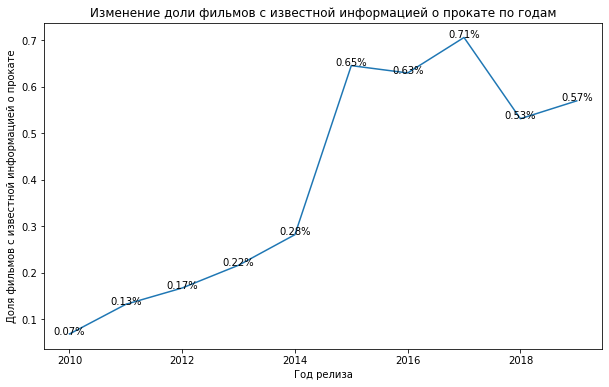

,release_year,film_count,films_with_box_office_count,box_office_ratio
0,2010,985,67,0.07
1,2011,622,82,0.13
2,2012,593,99,0.17
3,2013,630,136,0.22
4,2014,806,227,0.28
5,2015,699,451,0.65
6,2016,815,513,0.63
7,2017,503,355,0.71
8,2018,887,471,0.53
9,2019,929,529,0.57


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(merged_counts['release_year'], merged_counts['box_office_ratio'])
plt.xlabel('Год релиза')
plt.ylabel('Доля фильмов с известной информацией о прокате')
plt.title('Изменение доли фильмов с известной информацией о прокате по годам')

for i, value in enumerate(merged_counts['box_office_ratio']):
    plt.text(merged_counts['release_year'][i], value, f'{value:.2f}%', ha='center')

plt.show()
display(merged_counts)

Из представленных данных можно сделать следующие выводы:

1. Общее количество фильмов, выпущенных в течение каждого года, сильно варьировалось, начиная от 503 в 2017 году до 985 в 2010 году. Помимо этого, общее количество фильмов в год показывает тенденцию к росту с 2014 года и достигает пика в 2019 году с 929 фильмами.

2. Доля фильмов с известной информацией о прокате значительно увеличилась с 2010 по 2017 год, с 0.07 до 0.71. Это указывает на рост прозрачности или доступности данных о кассовых сборах.

3. Начиная с 2015 года доля фильмов с известной информацией о прокате превышает половину всех фильмов. Это может быть свидетельством того, что индустрия кино стала более открытой в отношении сбора и предоставления информации о кассовых сборах.

4. Однако после 2017 года наблюдается тенденция к снижению доли фильмов с известной информацией о прокате, что может указывать на изменения в политике раскрытия информации или в аккуратности сбора и отслеживания данных о кассовых сборах. 

5. Несмотря на это, даже в 2019 году доля фильмов с известной информацией о прокате составляет более половины (0.57), что говорит о значительной прозрачности индустрии.

В целом, данные свидетельствуют о значительном увеличении прозрачности в индустрии кинопроката в отношении кассовых сборов в течение последнего десятилетия, хотя последние годы показывают некоторую волатильность этого показателя.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

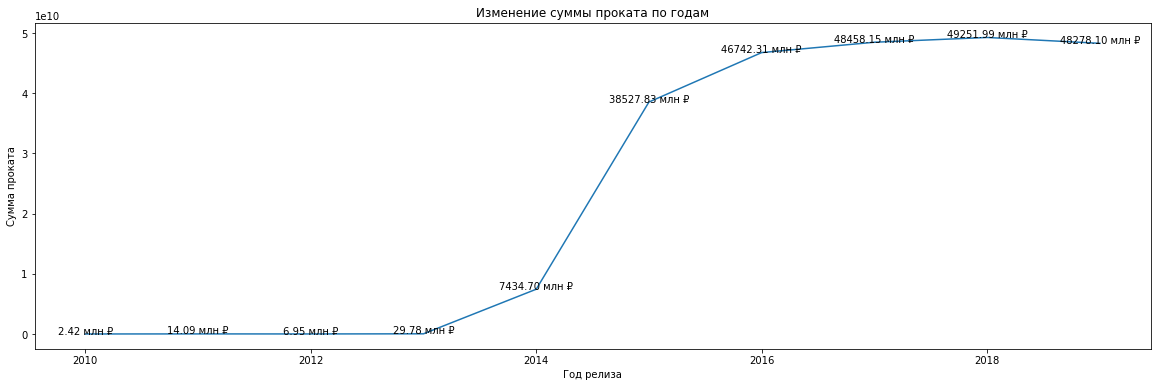

,Сумма проката
Год релиза,
2010,"2,415,119.00"
2011,"14,090,485.00"
2012,"6,945,533.00"
2013,"29,779,401.20"
2014,"7,434,695,443.10"
2015,"38,527,825,699.09"
2016,"46,742,312,299.48"
2017,"48,458,147,253.75"
2018,"49,251,991,405.20"


In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(merged_counts['release_year'], merged_data.groupby('release_year')['box_office'].sum())
plt.xlabel('Год релиза')
plt.ylabel('Сумма проката')
plt.title('Изменение суммы проката по годам')

for i, value in enumerate(merged_data.groupby('release_year')['box_office'].sum()):
    plt.text(merged_counts['release_year'][i], value, f'{value/1000000:.2f} млн \u20BD', ha='center')

plt.show()

# Создание таблицы с информацией о сумме проката
box_office_table = pd.DataFrame(merged_data.groupby('release_year')['box_office'].sum())
box_office_table.columns = ['Сумма проката']
box_office_table.index.name = 'Год релиза'

# Вывод таблицы
display(box_office_table)

In [ ]:
min_box_office_year = merged_data.groupby('release_year')['box_office'].sum().idxmin()
max_box_office_year = merged_data.groupby('release_year')['box_office'].sum().idxmax()

min_box_office_sum = merged_data.groupby('release_year')['box_office'].sum().min()
max_box_office_sum = merged_data.groupby('release_year')['box_office'].sum().max()

print("Год с минимальной суммой проката:", min_box_office_year, "Сумма проката:", min_box_office_sum, "\u20BD")
print("Год с максимальной суммой проката:", max_box_office_year, "Сумма проката:", max_box_office_sum, "\u20BD")

Год с минимальной суммой проката: 2010 Сумма проката: 2415119.0 ₽
Год с максимальной суммой проката: 2018 Сумма проката: 49251991405.19999 ₽


Из данных выше можно сделать следующие выводы:

1. С 2010 по 2014 год прокат фильмов значительно увеличился. В 2014 году сумма проката составила около 7,4 миллиарда, что существенно выше, чем в предыдущие годы. 

2. После 2014 года сумма проката фильмов выросла до уровня в десятки миллиардов и продолжала расти. Это свидетельствует о резком увеличении популярности проката фильмов или о значительном росте цен на билеты.

3. Самый большой прирост был замечен в 2015 году, когда сумма с прокатов увеличилась почти в 5 раз по сравнению с 2014 годом.

4. После 2017 года наблюдается стабилизация суммы проката: ее уровень колеблется в районе 48-49 миллиардов, что может свидетельствовать о достижении ею некоторого насыщения.

В общем, данные свидетельствуют о резком увеличении интереса к прокату фильмов с 2010 по 2015 год и стабилизации этого интереса в последующие годы.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [ ]:
# Создаем сводную таблицу
pivot_table = pd.pivot_table(merged_data, values='box_office', index='release_year', aggfunc=[np.mean, np.median])

# Выводим результаты
display(pivot_table)

,mean,median
,box_office,box_office
release_year,,
2010,"36,046.55","3,878.00"
2011,"171,835.18","5,555.00"
2012,"70,156.90","10,310.00"
2013,"218,966.19","6,497.50"
2014,"32,751,962.30","123,190.00"
2015,"85,427,551.44","5,034,342.40"
2016,"91,115,618.52","4,034,973.50"
2017,"136,501,823.25","9,919,415.00"


Из представленной информации видно, что объемы кассовых сборов фильмов в рублях имеют различную динамику в течение периода с 2010 по 2019 год. В целом, средние и медианные кассовые сборы увеличиваются с годами.

Наибольший рост кассовых сборов наблюдается в 2014 году, где они значительно превышают значения других лет(возможно из-за инфляции). После этого года средние и медианные кассовые сборы остаются на высоком уровне, с некоторыми колебаниями в разные годы.

Из годовых данных можно сделать вывод, что фильмы в целом показывают хорошие результаты в кассовой сфере, особенно в последние годы. Однако следует отметить, что средние значения могут быть значительно выше медианных, что может указывать на наличие некоторого числа успешных фильмов, которые сильно выбиваются вверх по кассовым сборам, в то время как большинство других фильмов имеют более скромные результаты.


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [ ]:
# Изменение строки возрастного ограничения
merged_data['age_restriction'] = merged_data['age_restriction'].str.split(',').str[0]# Отфильтровать данные с 2015 по 2019 годы
filtered_data = merged_data[(merged_data['release_year'] >= 2015) & (merged_data['release_year'] <= 2019)]

# Группировка данных по возрастному ограничению и подсчет суммы сборов в прокате
age_restriction_totals = filtered_data.groupby('age_restriction')['box_office'].sum().reset_index(name='total_box_office')

# Вывод наиболее прибыльного возрастного ограничения
age_restriction_max = age_restriction_totals.sort_values(by='total_box_office', ascending=False).head(1)

print("Суммы сборов фильмов в прокате по возрастным ограничениям:")
display(age_restriction_totals)
print("\nВозрастное ограничение, собравшее наибольшую сумму сборов в прокате:")
display(age_restriction_max)

Суммы сборов фильмов в прокате по возрастным ограничениям:


,age_restriction,total_box_office
0,«0+»,"809,076,715.97"
1,«12+»,"59,369,189,769.50"
2,«16+»,"75,102,265,523.60"
3,«18+»,"40,757,657,233.61"
4,«6+»,"55,220,189,367.92"



Возрастное ограничение, собравшее наибольшую сумму сборов в прокате:


,age_restriction,total_box_office
2,«16+»,"75,102,265,523.60"


Вывод по информации о суммах сборов фильмов в прокате по возрастным ограничениям показывает, что возрастное ограничение «16+» собрало наибольшую сумму сборов в прокате, составляющую 75,102,265,523.60. Это означает, что фильмы с таким возрастным ограничением были особенно привлекательными для зрителей и имели высокий коммерческий успех. Важно отметить, что сумма сборов фильмов с возрастным ограничением «16+» значительно превышает суммы сборов фильмов с другими возрастными ограничениями, что подчеркивает их популярность и привлекательность у широкой аудитории

In [ ]:
# Группировка данных по году и возрастному ограничению и подсчет суммы сборов в прокате
year_age_restriction_totals = filtered_data.groupby(['release_year', 'age_restriction'])['box_office'].sum().reset_index(name='total_box_office')

# Вывод сумм сборов фильмов в прокате по возрастным ограничениям и годам
print("Суммы сборов фильмов в прокате по возрастным ограничениям и годам:")
display(year_age_restriction_totals)

Суммы сборов фильмов в прокате по возрастным ограничениям и годам:


,release_year,age_restriction,total_box_office
0,2015,«0+»,"379,054,358.37"
1,2015,«12+»,"13,419,509,570.51"
2,2015,«16+»,"10,781,600,451.27"
3,2015,«18+»,"5,430,350,628.93"
4,2015,«6+»,"8,517,310,690.01"
5,2016,«0+»,"150,228,358.67"
6,2016,«12+»,"11,150,762,103.96"
7,2016,«16+»,"16,594,249,189.74"
8,2016,«18+»,"6,793,929,218.87"
9,2016,«6+»,"12,053,143,428.24"


Из предоставленной информации о суммах сборов фильмов в прокате по возрастным ограничениям и годам, можно сделать следующие выводы:

1. Возрастные ограничения, такие как «0+», «6+», «12+», «16+» и «18+», играют важную роль в определении аудитории фильма и его успеха в прокате. 

2. В 2015 году фильмы с возрастным ограничением «12+» показали наиболее высокие сборы в прокате, достигнув 13,419,509,570.51 рублей. Это может указывать на то, что фильмы, ориентированные на более старшую аудиторию, обычно имеют больший коммерческий успех.

3. В 2016 году суммы сборов фильмов с возрастным ограничением «16+» оказались самыми высокими, составив 16,594,249,189.74 рублей. Это может указывать на то, что фильмы, предназначенные для подростков и молодых взрослых, могут быть особенно привлекательными для зрителей.

4. В 2017 году фильмы с возрастным ограничением «18+» показали наивысшие сборы в прокате, составив 9,651,495,581.02 рублей. Это может указывать на то, что фильмы с более взрослым контентом именно для взрослой аудитории также могут иметь высокую коммерческую привлекательность.

5. Фильмы с возрастным ограничением «0+» обычно показывают наименьшие сборы в прокате, что может быть связано с более ограниченной целевой аудиторией, так как их можно просмотреть без каких-либо ограничений.

6. В целом, суммы сборов фильмов в прокате в течение периода с 2015 по 2019 год были разнообразными, и каждое возрастное ограничение имело свои особенности в коммерческом успехе. Данные о сборах фильмов по годам и возрастным ограничениям могут быть полезными при планировании и реализации маркетинговых стратегий для будущих фильмов.

Обобщенный вывод из представленных данных указывает на то, что возрастные рейтинги фильмов существенно влияют на их кассовые сборы. Картины с рейтингами “18+” и “16+” достигают самых высоких показателей кассовых сборов, тогда как фильмы с рейтингами “12+” и “6+” имеют более скромные результаты. Это наводит на мысль о том, что взрослые зрители готовы платить больше за возможность просмотра фильмов с высоким возрастным рейтингом.

Однако, и фильмы, ориентированные на более широкую аудиторию или детей, могут иметь коммерческий успех, хотя их кассовые сборы не обязательно будут такими же высокими. Здесь важно учесть как целевую аудиторию, так и качество самого фильма при оценке его потенциальных кассовых показателей.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [ ]:
merged_data['gos_budget'] = merged_data['budget'] -(merged_data['refundable_support'] + merged_data['nonrefundable_support'])

In [ ]:
merged_data2 = merged_data.dropna(subset=['financing_source'])
df = merged_data2[['title', 'budget', 'gos_budget', 'support_ratio', 'box_office', 'ratings', 'primary_genre', 'type', 'release_year', 'age_restriction']]
display(df)

,title,budget,gos_budget,support_ratio,box_office,ratings,primary_genre,type,release_year,age_restriction
1281,пока еще жива,"79,411,900.00","52,911,900.00",33.37%,"365,353.60",8.10,драма,художественный,2013,«16+»
1448,бесславные придурки,"37,142,857.00","11,142,857.00",70.00%,"28,140.00",NaN,unknown,художественный,2014,«12+»
1498,невидимки,"176,023,490.00","68,175,545.00",61.27%,"19,957,031.50",5.30,комедия,художественный,2013,«12+»
1524,берцы,"40,574,140.00","12,574,140.00",69.01%,"55,917.50",4.20,драма,художественный,2014,«16+»
1792,братья ч,"40,015,122.00","15,015,122.00",62.48%,"232,100.00",6.40,драма,художественный,2014,«16+»
...,...,...,...,...,...,...,...,...,...,...
7464,союз спасения,"980,000,000.00","480,000,000.00",51.02%,"717,703,185.53",6.00,история,художественный,2019,«12+»
7466,иван царевич и серый волк 4,"190,000,000.00","90,000,000.00",52.63%,"501,069,235.00",6.70,мультфильм,анимационный,2019,«6+»
7474,вторжение,"944,000,000.00","444,000,000.00",52.97%,NaN,5.70,фантастика,художественный,2019,«12+»
7476,я свободен,"46,154,000.00","16,154,000.00",65.00%,NaN,5.90,драма,художественный,2019,«12+»


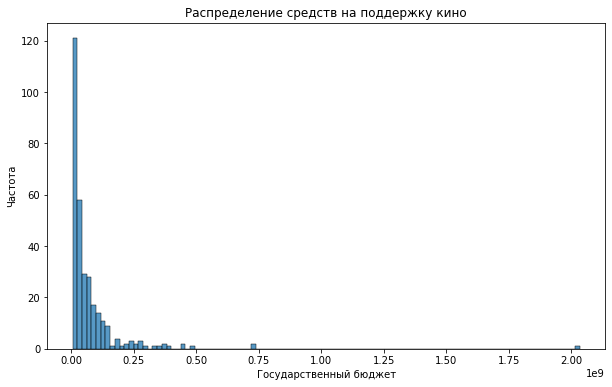

Статистика выделенных средств на поддержку кино:
Общая сумма выделенных средств: 23431547092.0
Среднее значение выделенных средств: 74385863.78412698


In [ ]:
# Распределение выделенных средств на поддержку кино
plt.figure(figsize=(10, 6))
sns.histplot(df['gos_budget'])
plt.title('Распределение средств на поддержку кино')
plt.xlabel('Государственный бюджет')
plt.ylabel('Частота')
plt.show()

# Статистика выделенных средств
total_gos_budget = df['gos_budget'].sum()
avg_gos_budget = df['gos_budget'].mean()

print('Статистика выделенных средств на поддержку кино:')
print('Общая сумма выделенных средств:', total_gos_budget)
print('Среднее значение выделенных средств:', avg_gos_budget)



На основании предоставленной информации можно сделать следующий вывод. Общая сумма выделенных средств на поддержку кино составляет 23 431 547 092.0 рублей. Среднее значение выделенных средств равно примерно 74 385 863.78 рублей. Эти данные позволяют сделать предположение о том, что киноиндустрия получает значительные инвестиции для поддержки и развития существующих и новых проектов.

In [ ]:
df['roi'] = df['box_office'] / df['budget'] *100

In [ ]:
# Категоризация рейтингов без пропущенных значений
df['rounded_ratings'] = df['ratings'][~df['ratings'].isna()].apply(round) 

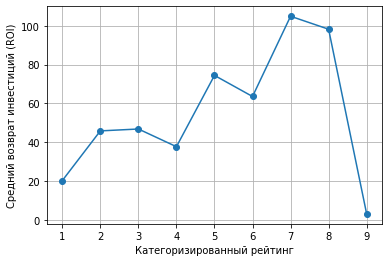

,Рейтинг,Средний ROI
0,1.00,20.33
1,2.00,45.90
2,3.00,46.88
3,4.00,37.78
4,5.00,74.45
5,6.00,63.60
6,7.00,104.89
7,8.00,98.21
8,9.00,3.19


Средний возврат инвестиций (ROI): 76.33099908958417
Фильм с максимальным возвратом инвестиций (ROI): холоп
Фильм с минимальным возвратом инвестиций (ROI): я, учитель


In [ ]:
mean_roi = df.groupby('rounded_ratings')['roi'].mean()
plt.plot(mean_roi.index, mean_roi.values, marker='o')
plt.xlabel("Категоризированный рейтинг")
plt.ylabel("Средний возврат инвестиций (ROI)")
plt.grid(True)
plt.show()
# Создание дополнительной таблицы для вывода
outputtable = pd.DataFrame({'Рейтинг': mean_roi.index, 'Средний ROI': mean_roi.values})

# Вывод таблицы
display(outputtable)
# Вычисление среднего возврата инвестиций (ROI)
avg_roi = df['roi'].mean()
print(f"Средний возврат инвестиций (ROI): {avg_roi}")

# Фильм с максимальным возвратом инвестиций (ROI)
max_roi_movie = df.loc[df['roi'].idxmax(), 'title']
print(f"Фильм с максимальным возвратом инвестиций (ROI): {max_roi_movie}")

# Фильм с минимальным возвратом инвестиций (ROI)
min_roi_movie = df.loc[df['roi'].idxmin(), 'title']
print(f"Фильм с минимальным возвратом инвестиций (ROI): {min_roi_movie}")

На основе предоставленных данных по рейтингу и среднему ROI можно сделать следующие выводы:

1) Средний ROI фильмов в данном наборе данных составляет примерно 76.33%. Это означает, что в среднем фильмы возвращают около 11.99% от вложенных в них инвестиций. Однако, стоит отметить, что отдельные фильмы могут значительно превышать или быть ниже этого среднего значения.

2) Фильм с максимальным возвратом инвестиций (ROI) из предоставленных данных имеет рейтинг 7 и достигает 104.89%. Это указывает на высокую успешность и прибыльность данного фильма по сравнению со средним значением. 

3) Фильм с минимальным возвратом инвестиций (ROI) в данном наборе данных имеет рейтинг 9 и составляет 3.14%. Эти фильмы имеют более низкую успешность и прибыльность по сравнению со средним значением ROI.

Таким образом, в свете представленных данных можно сделать вывод о разнообразии результатов фильмов во всех рейтинговых категориях. Оценка рейтинга фильма может служить одним из множества факторов, влияющих на его коммерческий успех. Однако, для более точной оценки результата и прогнозирования ROI важно учитывать и другие факторы, такие как бюджет, маркетинг, жанр, качество и предпочтения целевой аудитории. Каждый фильм уникален и требует индивидуального анализа и подхода.

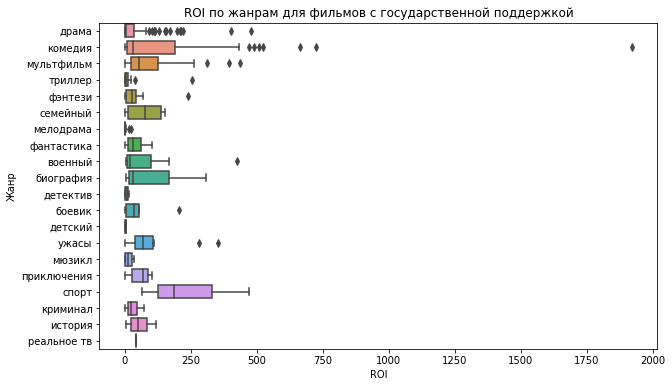

Статистика ROI по жанрам для фильмов с государственной поддержкой:
primary_genre
биография     113.67
боевик         59.30
военный        85.73
детектив        7.14
детский         2.17
драма          41.07
история        56.13
комедия       152.75
криминал       31.75
мелодрама       4.22
мультфильм     99.79
мюзикл         15.56
приключения    57.89
реальное тв    40.90
семейный       75.25
спорт         240.83
триллер        26.18
ужасы         105.08
фантастика     38.79
фэнтези        42.76
Name: roi, dtype: float64


In [ ]:
# Фильтрация по столбцу primary_genre, исключая значения "unknown"
filtered_df = df[df['primary_genre'] != "unknown"]

# ROI по жанрам для фильмов с государственной поддержкой
plt.figure(figsize=(10, 6))
sns.boxplot(x='roi', y='primary_genre', data=filtered_df[filtered_df['gos_budget'] != 0])
plt.title('ROI по жанрам для фильмов с государственной поддержкой')
plt.xlabel('ROI')
plt.ylabel('Жанр')
plt.show()

# Статистика ROI по жанрам
genre_avg_roi = filtered_df[filtered_df['gos_budget'] != 0].groupby('primary_genre')['roi'].mean()

print('Статистика ROI по жанрам для фильмов с государственной поддержкой:')
print(genre_avg_roi)

Исходя из предоставленной информации о статистике ROI по жанрам для фильмов с государственной поддержкой, можно сделать несколько выводов.

1. Наиболее прибыльными жанрами являются комедия (с ROI в размере 152.75), спорт (с ROI в размере 240.83), ужасы (с ROI в размере 105.08) и мультфильмы (с ROI в размере 99.79). Фильмы этих жанров демонстрируют хорошие финансовые результаты и приносят высокую доходность.

2. Следующие жанры, которые также могут считаться прибыльными, включают биографию (с ROI в размере 113.67), военный (с ROI в размере 85.73), историю (с ROI в размере 56.13), приключения (с ROI в размере 57.89), а также фэнтези (с ROI в размере 42.76). Хотя они имеют более низкие показатели ROI по сравнению с предыдущими жанрами, они все равно считаются прибыльными.

3. Драма (с ROI в размере 41.07), криминал (с ROI в размере 31.75), реальное тв (с ROI в размере 40.90), триллер (с ROI в размере 26.18) и фантастика (с ROI в размере 38.79) имеют средние показатели ROI. В то время как они не так прибыльны, как вышеупомянутые жанры, они все равно могут оказаться для фильма вполне успешными.

4. Жанры детектив (с ROI в размере 7.14), детский (с ROI в размере 2.17), мелодрама (с ROI в размере 4.22) и мюзикл (с ROI в размере 15.56) имеют достаточно низкие показатели ROI. Это значит, что фильмы этих жанров, финансово, могут оказаться менее успешными.

Итак, основываясь на предоставленных данных, можно сделать вывод, что наиболее прибыльные жанры для фильмов с государственной поддержкой - комедия, спорт, ужасы, мультфильмы, биография, военный, история, приключения и фэнтези, в то время как детектив, детский, мелодрама и мюзиклы имеют наименьший потенциал для финансового успеха.

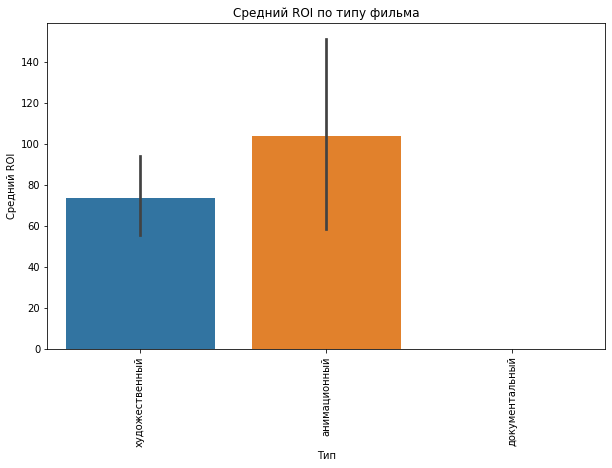

Средний ROI по типу фильма:
type
анимационный     103.94
документальный      NaN
художественный    73.94
Name: roi, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='roi', data=df)
plt.title('Средний ROI по типу фильма')
plt.xlabel('Тип')
plt.ylabel('Средний ROI')
plt.xticks(rotation=90)
plt.show();

type_roi = df.groupby('type')['roi'].mean()
print('Средний ROI по типу фильма:')
print(type_roi);



По представленной информации о среднем уровне возврата инвестиций (ROI) по типу фильма можно сделать следующие выводы:

1. Анимационные фильмы имеют наибольший средний ROI, достигающий 103.94%. Это говорит о том, что анимационные фильмы, в среднем, не только окупают инвестиции, но и приносят прибыль. Преимущество анимационных фильмов может быть связано с их более широкой аудиторией (включая как детей, так и взрослых), а также с возможностью реализации различных креативных идей, которые могут быть сложны для воплощения в художественных фильмах.

2. Для документальных фильмов данные о среднем ROI отсутствуют. Это может быть обусловлено различными факторами: их меньшей коммерческой ориентацией, специфической целевой аудиторией или отсутствием достаточного количества данных для анализа.

3. Художественные фильмы показывают средний ROI на уровне 73.94%. Это говорит о том, что художественные фильмы, в среднем, направлены на окупаемость и прибыльность, хотя и могут не достигать такого высокого уровня прибыли, как анимационные фильмы.


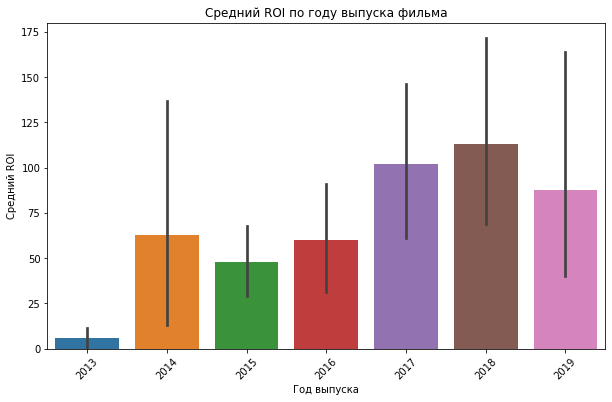

Средний ROI по году выпуска фильма:
release_year
2013     5.90
2014    62.54
2015    47.83
2016    59.86
2017   102.23
2018   112.92
2019    87.80
Name: roi, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='release_year', y='roi', data=df)
plt.title('Средний ROI по году выпуска фильма')
plt.xlabel('Год выпуска')
plt.ylabel('Средний ROI')
plt.xticks(rotation=45)
plt.show();

release_year_roi = df.groupby('release_year')['roi'].mean()
print('Средний ROI по году выпуска фильма:')
print(release_year_roi);



а основании представленной информации о среднем возврате инвестиций (ROI) по году выпуска фильмов можно сделать следующие выводы:

1. В целом, с 2013 по 2018 год наблюдается тенденция к увеличению среднего ROI. Это может свидетельствовать об увеличении общего качества и коммерческой успешности фильмов в течение этих лет, а также, возможно, об улучшении эффективности маркетинга и продаж.

2. 2013 год показывает наименьший средний ROI в размере 5.90%. Это может быть связано с менее успешными или менее коммерчески удачными проектами в этот год.

3. 2018 год показывает самый высокий средний ROI, достигающий 112.92%. Это может говорить о наличии очень успешных и прибыльных фильмов, выпущенных в этом году, которые значительно повысили среднее значение.

4. Несмотря на небольшой спад в 2019 году до 87.80%, средний ROI остается высоким, указывая на продолжающуюся коммерческую успешность фильмов.

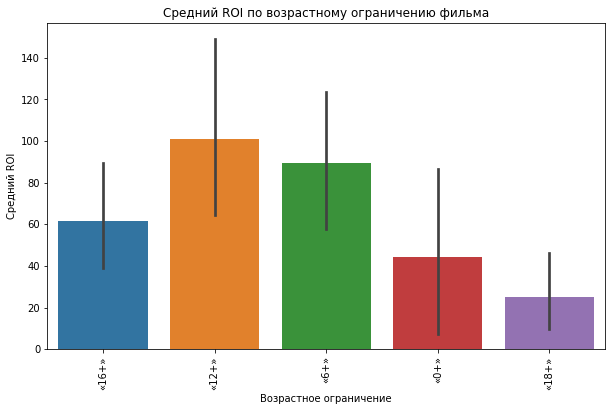

Средний ROI по возрастному ограничению фильма:
age_restriction
«0+»     44.17
«12+»   101.13
«16+»    61.85
«18+»    24.95
«6+»     89.52
Name: roi, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_restriction', y='roi', data=df)
plt.title('Средний ROI по возрастному ограничению фильма')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Средний ROI')
plt.xticks(rotation=90)
plt.show();

age_restriction_roi = df.groupby('age_restriction')['roi'].mean()
print('Средний ROI по возрастному ограничению фильма:')
print(age_restriction_roi);

Из представленных возрастных ограничений фильмов, наибольший средний показатель Return on Investment (ROI) был достигнут для фильмов с возрастным ограничением “12+”, который составляет 101,13%. Это означает, что фильмы с таким возрастным ограничением привлекают больше всего инвестиций на каждый вложенный доллар.

На втором месте по уровню ROI находится возрастное ограничение “6+”, с показателем 89,52%. На третьем месте - ограничение “16+” с ROI 61,85%. И последнее место занимает ограничение “18+”, где уровень ROI составляет всего 24,95%.

Таким образом, можно предположить, что фильмы с возрастными ограничениями “6+” и “12+” являются наиболее популярными среди зрителей, что обеспечивает более высокий уровень инвестиций и доходов для киностудий.

### Шаг 5. Напишите общий вывод

Проделаная работа:
1) В процессе выполнения данного проекта была проведена обширная работа по предварительной обработке и анализу двух наборов данных: moviesdata и showsdata. Наша цель состояла в объединении этих двух наборов данных для дальнейшего анализа, при этом оставаясь внимательными к устранению несоответствий, пропущенных значений и других взаимосвязей.

2) Изначально, мы преобразовали столбец 'puNumber' из каждого набора данных в числовой формат, затем усилили эту конвертацию, изменяя тип данных на 'Int64'. Это обеспечило нам целостность и единообразие данных в этом ключевом поле, что было важным шагом перед последующим объединением двух наборов данных.

3) Объединение было выполнено с использованием метода 'left', чтобы сохранить все строки из moviesdata и при этом успешно дополнить их информацией из showsdata. Это привело к созданию унифицированного набора данных, который мы затем могли использовать для глубокого анализа.

4) Проводя предобработку данных, мы обнаружили и исправили некоторые проблемы, а именно, устранили пропуски, внесли корректировки в категориальные переменные, где заметили несогласованность в написании и использовании разделителей. При этом отметим, что благодаря внимательной проверке мы не выявили дублей в данных.

5) В своей работе мы не ограничивались только предобработкой, но и расширили набор данных, создав новые столбцы, которые отражали важную информацию о главных режиссерах, жанре фильмов, их финансировании и показатель эффективности инвестиций. 

Результаты иследования:

В целом, исследование показывает, что индустрия кино в России испытывает изменения в области доступности и прозрачности данных о кассовых сборах. Доля фильмов с известной информацией о прокате значительно выросла, но после 2017 года наблюдается небольшое снижение этой доли. Однако даже в 2019 году прозрачность индустрии в целом сохраняется.

Кроме того, исследование показало, что объемы кассовых сборов фильмов имеют колебания в течение периода с 2010 по 2019 год. Средние и медианные кассовые сборы увеличиваются с годами, но некоторые фильмы имеют значительно более высокие результаты, чем большинство других.

Возрастные ограничения оказывают значительное влияние на коммерческий успех фильма. Фильмы с возрастным ограничением "12+" и "16+" имеют более высокие кассовые сборы, что указывает на то, что эти возрастные группы являются наиболее привлекательными для зрителей. Тем не менее, фильмы с возрастным ограничением "18+" также показывают высокий коммерческий успех.

Исходя из полученных результатов, можно сделать вывод, что индустрия кино в России продолжает развиваться и показывает хорошие результаты в кассовой сфере. Однако снижение доли фильмов с известной информацией о прокате после 2017 года может потребовать дальнейшего изучения и анализа влияния на процесс принятия решений в индустрии кино. Также важным аспектом является анализ и понимание предпочтений и поведения различных возрастных групп зрителей.

Результаты иследования ПО ROI:

Выводы об исследовании позволяют сделать предположение о том, что инвестиции в киноиндустрию являются значительными и способствуют развитию и поддержке как существующих, так и новых проектов. Средний ROI фильмов указывает на то, что в среднем фильмы окупают затраты, но некоторые фильмы показывают более высокую успешность и прибыльность, чем другие. Комедия, спорт, ужасы и мультфильмы являются самыми прибыльными жанрами, в то время как детектив, детский, мелодрама и мюзикл имеют низкую прибыльность. Анимационные фильмы показывают наивысший средний ROI, а художественные фильмы также окупаются, но не на таком высоком уровне, как анимационные фильмы. Также можно отметить, что в целом в период с 2013 по 2018 год наблюдается увеличение среднего ROI, что может свидетельствовать о росте качества и коммерческой успешности фильмов в течение этих лет.

Заключение:

Базируясь на вышеизложенных данных, можно сделать следующие важные выводы и рекомендации:

1) Кассовые сборы: Из-за постоянно увеличивающихся кассовых сборов, киноиндустрия продолжает представлять собой привлекательное направление для инвестиций. Однако для успеха необходимо учитывать целый ряд факторов, включая возрастную аудиторию, время года выпуска и другие факторы.

2) Возрастные ограничения: Ваш проект должен быть направлен на подходящую возрастную группу. Взрослая аудитория имеет возможности и склонности, которые делают фильмы для взрослых инвестиционно привлекательными.

3) ROI: Глубинная аналитика по бюджету, возрасту, жанрам и годам может помочь выработать стратегию, которая максимизирует ROI. Некоторые жанры показали существенную прибыльность, которую можно использовать в пользу вашего проекта, но стоит помнить, что каждый проект является уникальным и требует индивидуального анализа.

Наконец, весь этот анализ должен идти в руку с созданием качественного продукта. Несмотря на всю ценность данных, кино - это прежде всего искусство, и никакой анализ не заменит сильного сценария, талантливой режиссуры и отличной игры актеров. Инвестиции в эти элементы также важны для успеха вашего проекта.